In [1]:
# Do not delete this cell. It ensures that you can do the imports,
# load datasets etc. in the same fashion as in any Python script
# in the project template.


import sys
sys.path.insert(0, '../..')
from bld.project_paths import project_paths_join as ppj
from bld.project_paths import project_paths as pp



# Collusion amongst humans and between humans and algorithms

In this notebook, I will investigate all other experimental treatments.

We begin by creating a bar plot of the outcomes by super game.

In [2]:
import numpy as np
import json
import pickle
import pandas as pd
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})


In [10]:
with open(ppj("OUT_DATA", "data_group_level.pickle"), "rb") as f:
    data_group_level = pickle.load(f)

In [36]:
all_treatments = ['2H0A', '1H1A', '3H0A', '2H1A', '1H2A' ]

In [123]:
 def make_bar_plot_all_sg(agg_level, data_in, all_treatments):
    # set width of bar
    barWidth = 0.17
    distance = 0
    super_games = 3
    
    # Hand picked colors
    all_colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
    
    # Handpick the hatches
    # for each super game
    hatches = ['-',  '-', '-',
               '\\', '\\', '\\',
               '+', '+', '+',
               '|', '|', '|',
               'X', 'X', 'X'] 

    
    fig, ax = plt.subplots(1)
    fig.set_size_inches(18.5, 10.5)
    
    plotting_dict = {}
    
    for treatment in all_treatments:
        plotting_dict[treatment] = {}
        plotting_dict[treatment]['sg_mean'] = list()
        plotting_dict[treatment]['sg_error_bar'] = list()
        for sg in [1, 2, 3]:
            plotting_dict[treatment]['sg_mean'].append(
                    np.mean(data_in.loc[(data_in['super_game'] == sg) & (data_in['treatment'] == treatment)][agg_level])
            )
            # CHECK TODO: has to be based on actual number of independent observations
            if sg == 1:
                error_group_by = 'group_id_general'
            else:
                error_group_by = 'super_group_id_general'
            plotting_dict[treatment]['sg_error_bar'].append(
                        data_in.loc[(data_in['super_game'] == sg) &
                                    (data_in['treatment'] == treatment)].groupby([error_group_by]).mean()[agg_level].sem()
            )
    

        
    all_r = [np.arange(super_games) + barWidth*x for x in range(len(all_treatments))] 
    
    # Make the plot
    for ix_treatment, treatment in enumerate(all_treatments):
        ax.bar(all_r[ix_treatment], plotting_dict[treatment]['sg_mean'],
               yerr=plotting_dict[treatment]['sg_error_bar'],
               color=all_colors[ix_treatment], width=barWidth, edgecolor='white',
               label=treatment, capsize=4)

    # Add xticks on the middle of the group bars
    # plt.xlabel('group', fontweight='bold')
    if agg_level == 'winning_price':
        ax.set_ylim([0,5])
        #ax.set_title('Mean market price by super game and treatments')
    elif agg_level == 'collusive':
        ax.set_ylim([0,1])
        #ax.set_title('Share of collusive market outcomes by super game and treatments')

    ax.set_xticks([r + barWidth*2 for r in range(super_games)])
    ax.set_xticklabels(['Super game 1', 'Super game 2', 'Super game 3'])
    
    # Create the label (VOD rate) over the error bar
    rects = ax.patches
    all_means = list(np.array([plotting_dict[treatment]['sg_mean']  for treatment in all_treatments]).flat)
    all_error = list(np.array([plotting_dict[treatment]['sg_error_bar']  for treatment in all_treatments]).flat)
    labels = ['%.3f' % elem for elem in all_means]
    distances = all_error

    for rect, label, distance in zip(rects, labels, distances):
        height = rect.get_height() + distance
        ax.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom', fontweight='bold')
    
    # Loop over the bars to add hatches
    for i,thisbar in enumerate(rects):
        # Set a different hatch for each bar
        thisbar.set_hatch(hatches[i])

    # Create legend & Show graphic
    ax.legend(loc='lower center', bbox_to_anchor =(0.5,-0.2), ncol=3)
    #fig.savefig('./bar_plot_{}_level.pdf'.format(agg_level), bbox_inches='tight')

In [176]:
 def make_bar_plot_sg_pooled(agg_level, data_in, all_treatments):
    # set width of bar
    barWidth = 0.05
    distance = 0
    
    # Hand picked colors
    all_colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
    
    # Handpick the hatches
    # for each super game
    hatches = ['-', 
               '\\', 
               '+', 
               '|', 
               'X',] 

    
    fig, ax = plt.subplots(1)
    fig.set_size_inches(12.5, 10.5)
    
    plotting_dict = {}
    
    for treatment in all_treatments:
        plotting_dict[treatment] = {}
        plotting_dict[treatment]['mean'] = list()
        plotting_dict[treatment]['error_bar'] = list()
        plotting_dict[treatment]['mean'].append(
                np.mean(data_in.loc[ (data_in['treatment'] == treatment)][agg_level])
        )
        plotting_dict[treatment]['error_bar'].append(
                    data_in.loc[
                        (data_in['treatment'] == treatment)
                    ].groupby(['super_group_id_general']).mean()[agg_level].sem()
        )
    

        
    all_r = [np.arange(1) + barWidth*x for x in range(len(all_treatments))] 
    
    # Make the plot
    for ix_treatment, treatment in enumerate(all_treatments):
        ax.bar(all_r[ix_treatment], plotting_dict[treatment]['mean'],
               yerr=plotting_dict[treatment]['error_bar'],
               color=all_colors[ix_treatment], width=barWidth, edgecolor='white',
               label=treatment, capsize=4)

    # Add xticks on the middle of the group bars
    # plt.xlabel('group', fontweight='bold')
    if agg_level == 'winning_price':
        ax.set_ylim([0,5])
    elif agg_level == 'collusive':
        ax.set_ylim([0,1])

    ax.set_xticks([])
#     ax.set_xticklabels(['Super game 1', 'Super game 2', 'Super game 3'])
    
    # Create the label (VOD rate) over the error bar
    rects = ax.patches
    all_means = list(np.array([plotting_dict[treatment]['mean']  for treatment in all_treatments]).flat)
    all_error = list(np.array([plotting_dict[treatment]['error_bar']  for treatment in all_treatments]).flat)
    labels = ['%.3f' % elem for elem in all_means]
    distances = all_error

    for rect, label, distance in zip(rects, labels, distances):
        height = rect.get_height() + distance
        ax.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom', fontweight='bold')
    
    # Loop over the bars to add hatches
    for i,thisbar in enumerate(rects):
        # Set a different hatch for each bar
        thisbar.set_hatch(hatches[i])

    # Create legend & Show graphic
    ax.legend(loc='lower center', bbox_to_anchor =(0.5,-0.2), ncol=3)
    #fig.savefig('./bar_plot_{}_level.pdf'.format(agg_level), bbox_inches='tight')

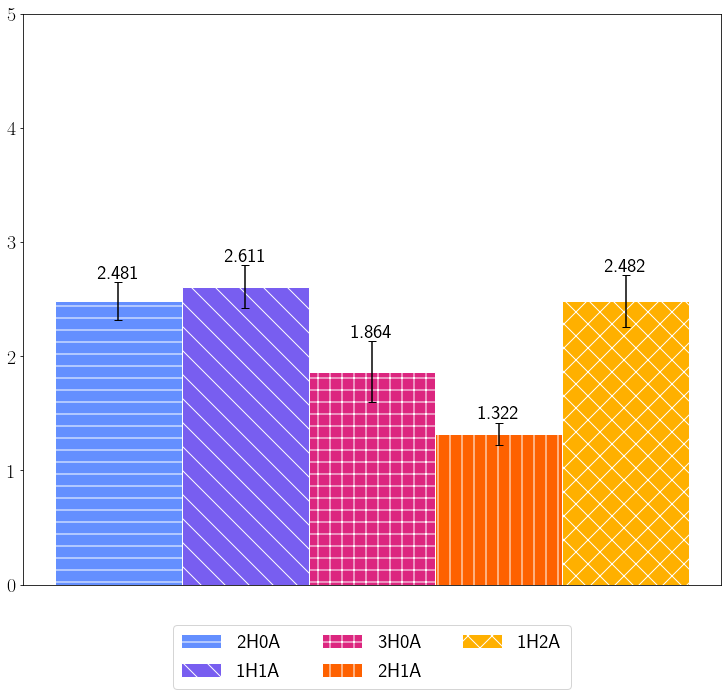

In [177]:
make_bar_plot_sg_pooled(agg_level='winning_price',
              data_in = data_group_level,
              all_treatments=all_treatments)

Then tests with MWU

In [178]:
from scipy.stats import mannwhitneyu, ttest_ind

In [147]:
data_super_group_level = data_group_level.groupby(['super_group_id_general', 'treatment'], as_index=False)[['winning_price', 'collusive']].mean()

Two vs three humans

In [151]:
mannwhitneyu(
    data_super_group_level.loc[data_super_group_level['treatment'] == '3H0A']['winning_price'],
    data_super_group_level.loc[data_super_group_level['treatment'] == '2H0A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.04042397933690852

Tacit collusion becomes harder as the number of firms increases in human markets. Differences become how ever small and are statistically insignificant after learning.

Next question: Does the share of algorithms in the market foster collusion?

Two firm markets:


In [159]:
mannwhitneyu(
    data_super_group_level.loc[data_super_group_level['treatment'] == '2H0A']['winning_price'],
    data_super_group_level.loc[data_super_group_level['treatment'] == '1H1A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.83563115352624

Nope

Three firm markets:

In [167]:
mannwhitneyu(
    data_super_group_level.loc[data_super_group_level['treatment'] == '3H0A']['winning_price'],
    data_super_group_level.loc[data_super_group_level['treatment'] == '1H2A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.17542896105941352

In [169]:
mannwhitneyu(
    data_super_group_level.loc[data_super_group_level['treatment'] == '3H0A']['winning_price'],
    data_super_group_level.loc[data_super_group_level['treatment'] == '2H1A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.06391934147515746

In [186]:
mannwhitneyu(
    data_super_group_level.loc[data_super_group_level['treatment'] == '1H2A']['winning_price'],
    data_super_group_level.loc[data_super_group_level['treatment'] == '2H1A']['winning_price'],
    use_continuity=False,
    alternative='two-sided'

)[-1]

0.005276795014053497

Differences in means for the three firm market:

    - Adding one algorithms makes market less collusive -> Effect weakly significant
    - Adding two algorithms increases market prices compared to only humans but effect not significant at 10% level
    - 1H2A however with significantly higher prices compared to 2H1A
        - Algos learn specific strategy which one human can adapt to
        - Difficult for humans to adapt jointly to algorithm strategy in 2H1A
      

interim conclusion:
   
    - Humans manage to collude with algorithms in mixed markets in some situations
    - No evidence that algorithms make markets more collusive compared to fully human markets
    - Algorithms may even hinder collusion if humans fail to adapt to specfic strategy
    - Next section takes closer look at evolution of human algorithmic collusion

In [219]:
def make_line_plot(agg_level, data_in, all_treatments):
    plt.style.use('bmh')

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 9))
    plt.subplots_adjust(wspace = 0.09)
    # Hand picked colors
    all_colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
    
    # Hand picked markers and dashes
    all_markers = ["v", "s", "P", "X", "d"]
    all_dashes = [(0, (1, 10)),(0, (1, 1)),  (0, (5, 10)),(0, (3, 10, 1, 10)),  (0, (3, 5, 1, 5, 1, 5))]
    xmax_by_sg = [25,17,11]
    
    # Make line plots
    for sg in [1,2,3]:
        for ix_treatment, treatment in enumerate(all_treatments):
            # For the second super game, add the label and else not
            if sg == 2:
                sns.lineplot(x = 'round', y=agg_level, data=data_in.loc[(data_in['super_game'] == sg) & (data_in['treatment'] == treatment)],
                    ax=axes[sg-1], color = all_colors[ix_treatment], ci=None,
                    marker = all_markers[ix_treatment], label = treatment)
            else:
                sns.lineplot(x = 'round', y=agg_level, data=data_in.loc[(data_in['super_game'] == sg) & (data_in['treatment'] == treatment)],
                    marker = all_markers[ix_treatment], ax=axes[sg-1], color = all_colors[ix_treatment], ci=None)
                
            # set the linestyle
            #axes[sg-1].lines[ix_treatment].set_linestyle(all_dashes[ix_treatment])
    

        axes[sg-1].set_xticks([i for i in range(1,xmax_by_sg[sg-1]+1,2)])
        axes[sg-1].set_xlabel('Round')
        axes[sg-1].set_ylabel('')
        axes[sg-1].set_title('Super Game {}'.format(sg))


    # Scale of axis
    if agg_level == 'winning_price' or agg_level == 'price' :
        for axis_index in range(3):
            axes[axis_index].set_ylim([0,6])
            axes[axis_index].set_yticks(range(0,6,1))

            axes[axis_index].hlines(1, xmax=xmax_by_sg[axis_index], xmin=1, label= 'Nash Equilibrium', colors='gray')
            axes[axis_index].hlines(4, xmax=xmax_by_sg[axis_index], xmin=1, label= 'Monopoly Price', colors= 'black')
    else:
        for axis_index in range(3):
            axes[axis_index].set_ylim([0,1.1])
            axes[axis_index].set_yticks(np.linspace(0,1,11))
            axes[axis_index].hlines(0, xmax=xmax_by_sg[axis_index], xmin=1, label= 'No Collusion', colors='gray')
            axes[axis_index].hlines(1, xmax=xmax_by_sg[axis_index], xmin=1, label= 'Full Collusion', colors= 'black')

    axes[1].legend(loc='lower center', bbox_to_anchor =(0.5,-0.5), ncol=3)


    #plt.savefig('./line_plot_{}_level.pdf'.format(agg_level), bbox_inches='tight')

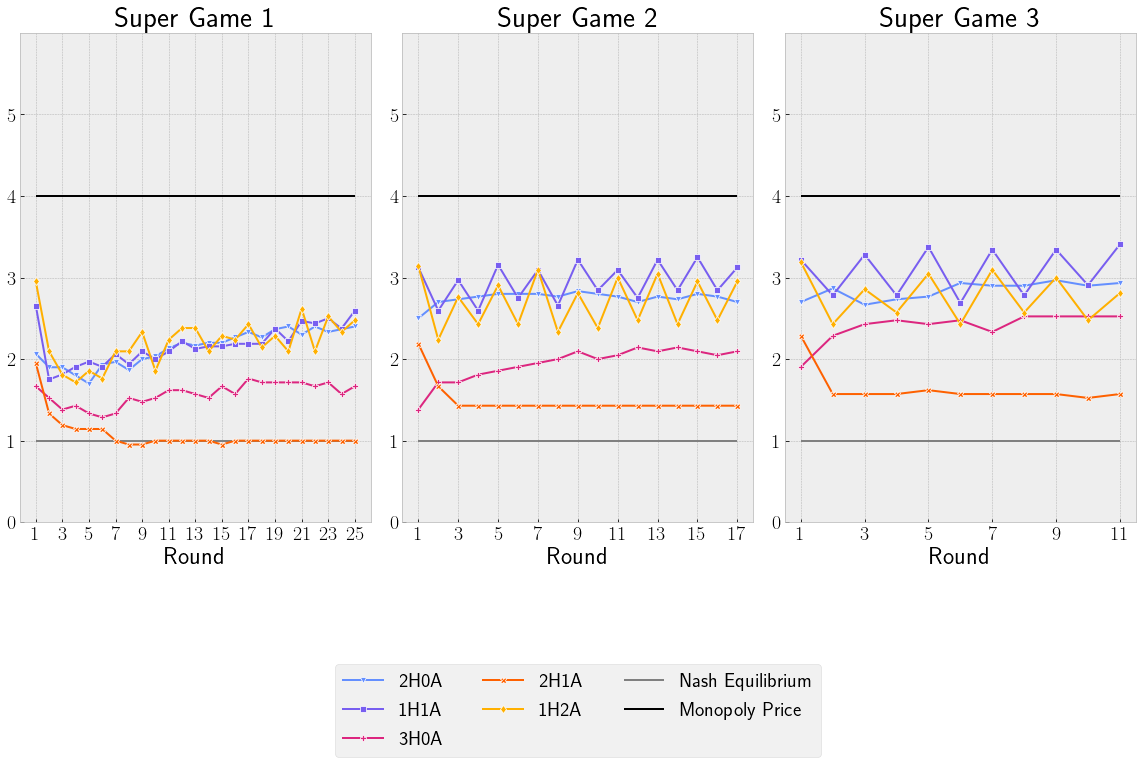

In [220]:
make_line_plot(agg_level = 'winning_price',
               data_in = data_group_level,
               all_treatments = all_treatments)